In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")  # make sure the CSV is in the same folder

# Display the first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# 1. Show the first 5 rows
display(df.head())

# 2. Summary statistics of numerical columns
display(df.describe())

# 3. Shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# 4. Data types and non-null counts
df.info()

# 5. Number of unique values per column
print("\nUnique values per column:")
print(df.nunique())




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Shape of the dataset: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Unique values per column:
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                   

In [10]:
print(" Data types:")
print(df.dtypes)


 Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [11]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_invalid_zeros:
    median = df[col].median()
    df[col] = df[col].replace(0, median)


In [12]:
# Re-check if any zeros remain in the affected columns
print("Zero counts after replacement:\n")
print(df[cols_with_invalid_zeros].isin([0]).sum())


Zero counts after replacement:

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [13]:
# Check for any missing (NaN) values in the dataset
print("Missing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


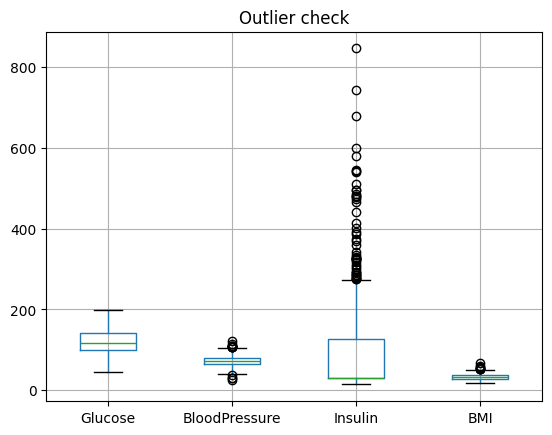

In [14]:
import matplotlib.pyplot as plt
df.boxplot(column=['Glucose', 'BloodPressure', 'Insulin', 'BMI'])
plt.title("Outlier check")
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
import numpy as np

# Convert scaled features back to DataFrame for readability
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check mean and standard deviation
print("Mean after scaling:\n", np.round(scaled_df.mean(), 2))
print("\nStandard deviation after scaling:\n", np.round(scaled_df.std(), 2))


Mean after scaling:
 Pregnancies                -0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness              -0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

Standard deviation after scaling:
 Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
SkinThickness               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
dtype: float64


In [17]:
# 2.3 Encoding Categorical Variables

# Attempt to select categorical columns (object dtype)
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) == 0:
    print(" No categorical variables to encode. All features are numeric.")
else:
    # Apply One-Hot Encoding if any were found (for future-proofing)
    df = pd.get_dummies(df, columns=categorical_cols)
    print(" Encoded categorical columns:", list(categorical_cols))


 No categorical variables to encode. All features are numeric.


In [18]:
# Copy the original df to keep things clean
df_fe = df.copy()

# 1. Create Age Group (e.g., 21–30, 31–40, etc.)
df_fe['AgeGroup'] = pd.cut(df_fe['Age'], bins=[20, 30, 40, 50, 60, 70, 100],
                           labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71+'])

# 2. Create BMI Category
df_fe['BMICategory'] = pd.cut(df_fe['BMI'],
                              bins=[0, 18.5, 24.9, 29.9, 100],
                              labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Show sample with new features
df_fe[['Age', 'AgeGroup', 'BMI', 'BMICategory']].head()


,Age,AgeGroup,BMI,BMICategory
0,50,41-50,33.6,Obese
1,31,31-40,26.6,Overweight
2,32,31-40,23.3,Normal
3,21,21-30,28.1,Overweight
4,33,31-40,43.1,Obese


In [19]:
df_fe = pd.get_dummies(df_fe, columns=['AgeGroup', 'BMICategory'], drop_first=True)


In [20]:
print("Current columns in dataset after Feature Engineering:\n")
print(df_fe.columns)


Current columns in dataset after Feature Engineering:

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeGroup_31-40',
       'AgeGroup_41-50', 'AgeGroup_51-60', 'AgeGroup_61-70', 'AgeGroup_71+',
       'BMICategory_Normal', 'BMICategory_Overweight', 'BMICategory_Obese'],
      dtype='object')


In [21]:
df_fe.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61-70,AgeGroup_71+,BMICategory_Normal,BMICategory_Overweight,BMICategory_Obese
0,6,148,72,35,30.5,33.6,0.627,50,1,False,True,False,False,False,False,False,True
1,1,85,66,29,30.5,26.6,0.351,31,0,True,False,False,False,False,False,True,False
2,8,183,64,23,30.5,23.3,0.672,32,1,True,False,False,False,False,True,False,False
3,1,89,66,23,94.0,28.1,0.167,21,0,False,False,False,False,False,False,True,False
4,0,137,40,35,168.0,43.1,2.288,33,1,True,False,False,False,False,False,False,True


In [22]:
print("Original shape:", df.shape)
print("After feature engineering:", df_fe.shape)


Original shape: (768, 9)
After feature engineering: (768, 17)


In [23]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_fe.drop('Outcome', axis=1)
y = df_fe['Outcome']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (614, 16)
Testing set shape: (154, 16)


In [24]:
print(df_fe.corr().isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
AgeGroup_31-40              0
AgeGroup_41-50              0
AgeGroup_51-60              0
AgeGroup_61-70              0
AgeGroup_71+                0
BMICategory_Normal          0
BMICategory_Overweight      0
BMICategory_Obese           0
dtype: int64


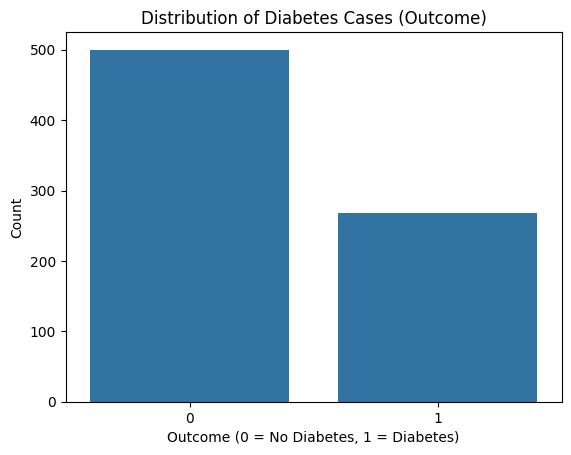

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of diabetic vs non-diabetic
sns.countplot(x='Outcome', data=df_fe)
plt.title('Distribution of Diabetes Cases (Outcome)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


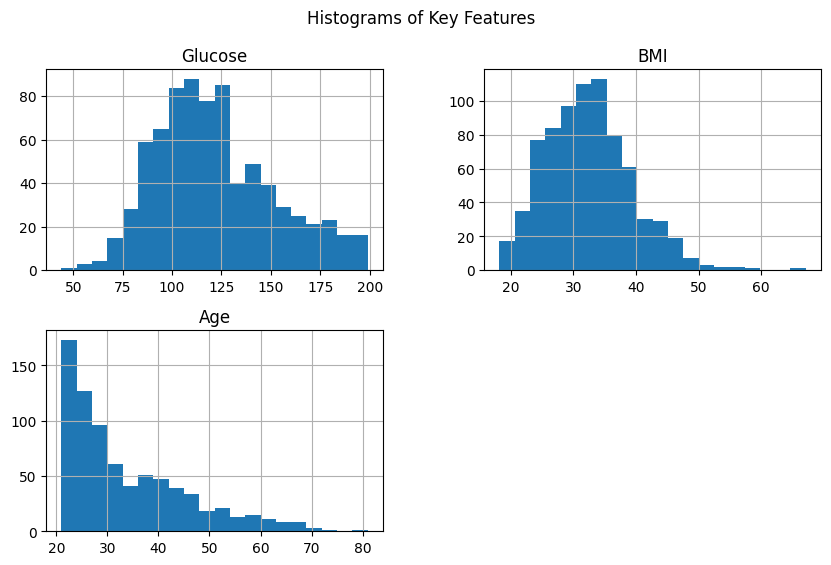

In [26]:
df_fe[['Glucose', 'BMI', 'Age']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Key Features')
plt.show()


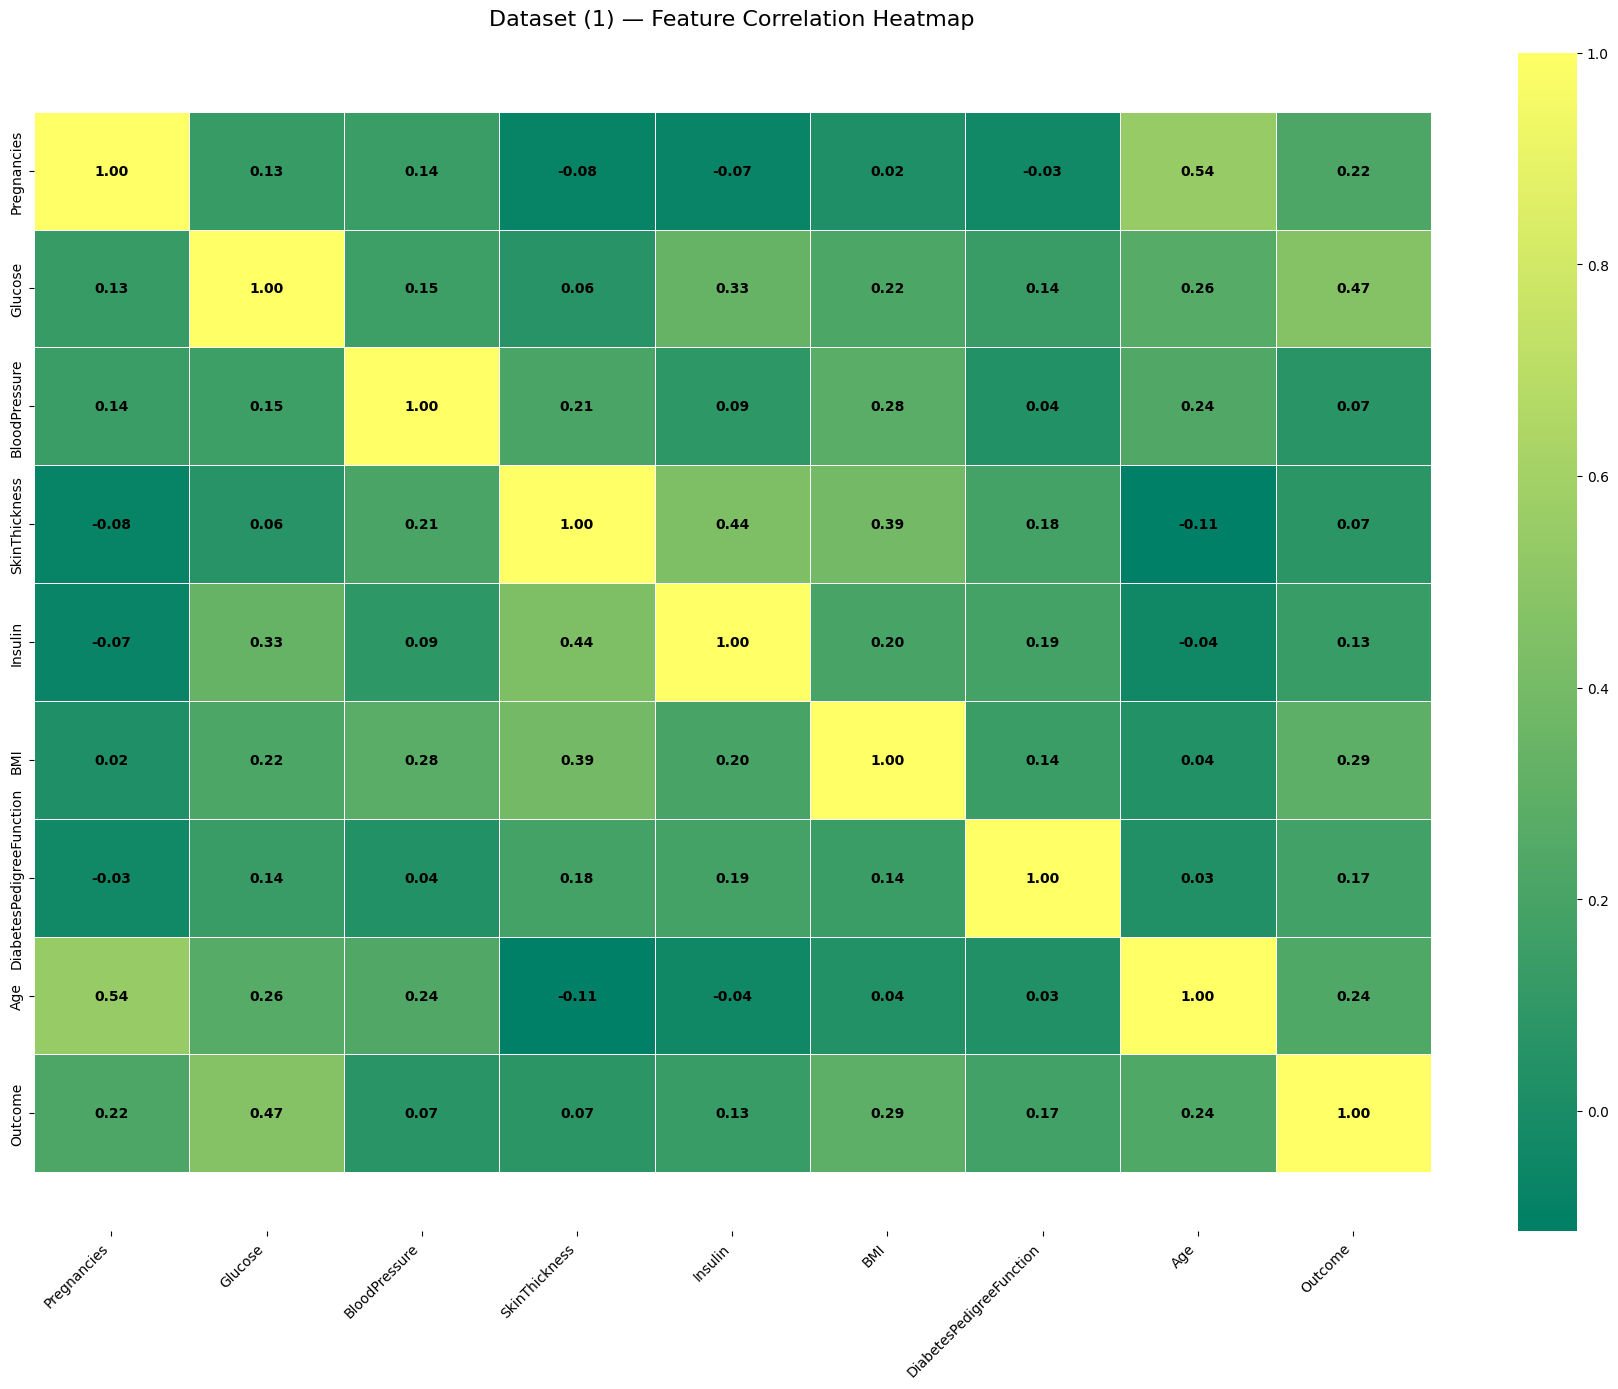

In [27]:
import pandas as pd

# Load the dataset
df_fe = pd.read_csv('/content/diabetes.csv')


plt.figure(figsize=(18, 14))  # larger plot area
ax = sns.heatmap(df_fe.corr(),
                 annot=True,
                 fmt=".2f",
                 cmap='summer',
                 linewidths=0.5,
                 linecolor='white',
                 annot_kws={"fontsize": 10, "color": "black", "weight": "bold"},
                 square=False)  # prevent forced squares when matrix is wide

# Fix cutoff
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Title and formatting
plt.title("Dataset (1) — Feature Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Classification Report (Decision Tree):
              precision    recall  f1-score   ROC-AUC
0              0.837209  0.727273  0.778378       NaN
1              0.602941  0.745455  0.666667       NaN
accuracy       0.733766  0.733766  0.733766       NaN
macro avg      0.720075  0.736364  0.722523       NaN
weighted avg   0.753542  0.733766  0.738481       NaN
ROC-AUC             NaN       NaN       NaN  0.736364

Prediction Accuracy: 73.38%


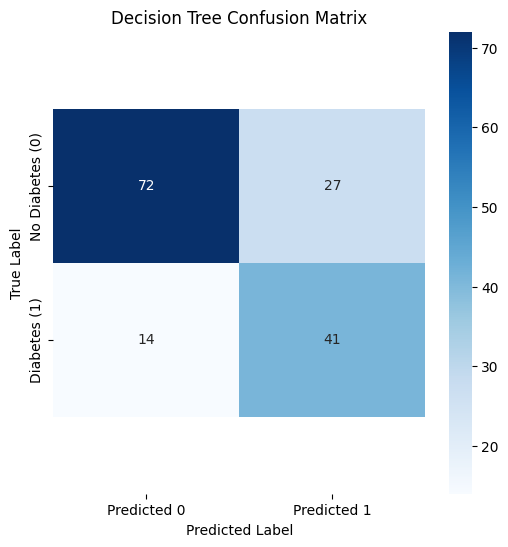

In [28]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=0, criterion='entropy')
dtree.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dtree.predict(X_test)
y_prob_dt = dtree.predict_proba(X_test)[:, 1]  # for ROC-AUC

# Evaluation Report (without support)
print("Classification Report (Decision Tree):")
report = classification_report(y_test, y_pred_dt, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(columns=['support'])

# Add ROC-AUC column to the DataFrame
df_report['ROC-AUC'] = np.nan  # create empty ROC-AUC column
roc_auc = roc_auc_score(y_test, y_prob_dt)

# Create ROC-AUC row and append it
roc_row = pd.DataFrame({
    'precision': [np.nan],
    'recall': [np.nan],
    'f1-score': [np.nan],
    'ROC-AUC': [roc_auc]
}, index=['ROC-AUC'])

df_report = pd.concat([df_report, roc_row])

# Display final report
print(df_report)

# Print Accuracy separately
print("\nPrediction Accuracy: {:.2f}%".format(dtree.score(X_test, y_test) * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
cm_df = pd.DataFrame(cm, index=['No Diabetes (0)', 'Diabetes (1)'],
                     columns=['Predicted 0', 'Predicted 1'])

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
ax = sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


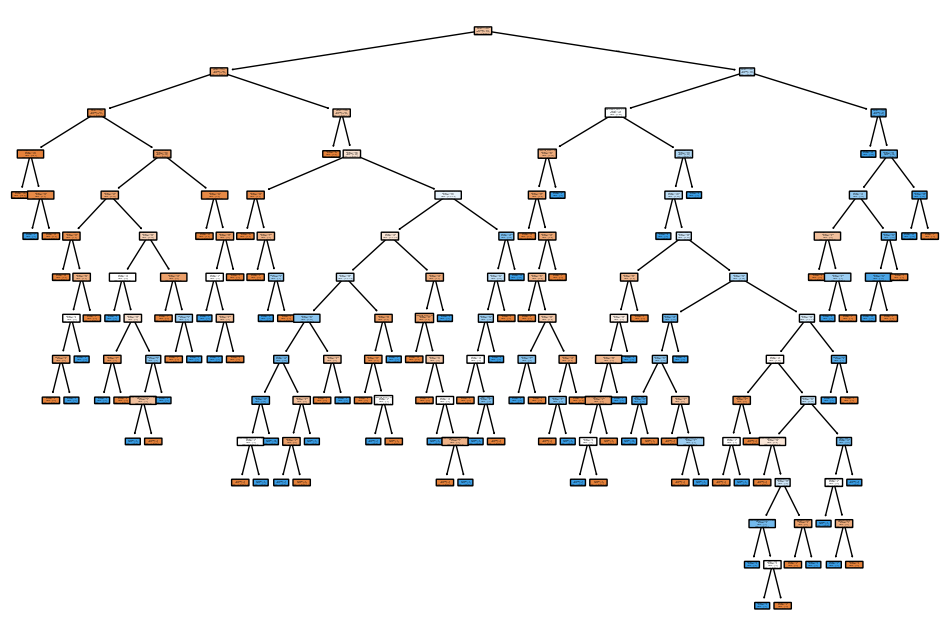

In [29]:
# Plotting the Decision Tree (based on your diabetes dataset)
from sklearn import tree
import matplotlib.pyplot as plt

# Feature names from your diabetes dataset
fn = X_train.columns.tolist()

# Class names for prediction outcome
cn = ["No Diabetes (0)", "Diabetes (1)"]

# Plot and save
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), dpi=100)
tree.plot_tree(dtree,
               filled=True,
               feature_names=fn,
               class_names=cn,
               rounded=True)
fig.savefig('diabetes_tree_plot.png')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Classification Report (Logistic Regression):
              precision    recall  f1-score   ROC-AUC
0              0.805825  0.838384  0.821782       NaN
1              0.686275  0.636364  0.660377       NaN
accuracy       0.766234  0.766234  0.766234       NaN
macro avg      0.746050  0.737374  0.741080       NaN
weighted avg   0.763129  0.766234  0.764138       NaN
ROC-AUC             NaN       NaN       NaN  0.820569

✅ Prediction Accuracy: 76.62%


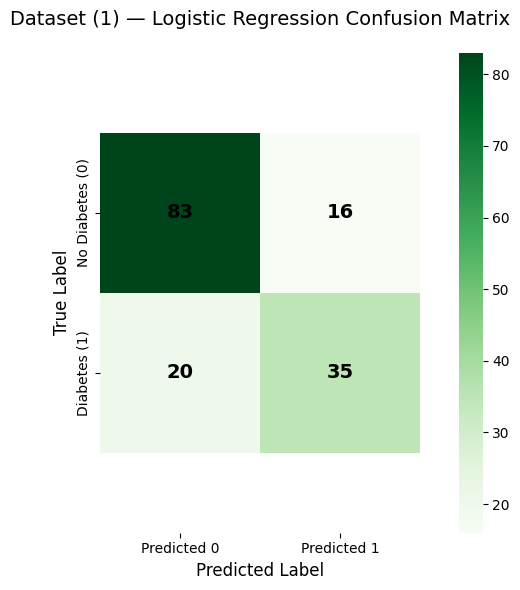

In [30]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, accuracy_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Classification report (without 'support')
report = classification_report(y_test, y_pred_lr, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(columns=['support'])

# Add ROC-AUC column
df_report['ROC-AUC'] = np.nan
roc_auc = roc_auc_score(y_test, y_prob_lr)

# Append ROC-AUC row
roc_row = pd.DataFrame({
    'precision': [np.nan],
    'recall': [np.nan],
    'f1-score': [np.nan],
    'ROC-AUC': [roc_auc]
}, index=['ROC-AUC'])

df_report = pd.concat([df_report, roc_row])
print("📊 Classification Report (Logistic Regression):")
print(df_report)

# Accuracy
acc = accuracy_score(y_test, y_pred_lr) * 100
print("\n✅ Prediction Accuracy: {:.2f}%".format(acc))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
cm_df = pd.DataFrame(cm, index=['No Diabetes (0)', 'Diabetes (1)'],
                     columns=['Predicted 0', 'Predicted 1'])

# Plot styled confusion matrix with title: Dataset (1)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_df, annot=True, fmt='g', cmap='Greens',
                 cbar=True, square=True,
                 annot_kws={"color": "black", "fontsize": 14, "weight": "bold"})
plt.title(f"Dataset (1) — Logistic Regression Confusion Matrix", fontsize=14, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Fix cutoff issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.tight_layout()
plt.show()


🔍 Classification Report (Random Forest):
              precision    recall  f1-score  ROC-AUC
0              0.842105  0.808081  0.824742      NaN
1              0.677966  0.727273  0.701754      NaN
accuracy       0.779221  0.779221  0.779221      NaN
macro avg      0.760036  0.767677  0.763248      NaN
weighted avg   0.783484  0.779221  0.780818      NaN
ROC-AUC             NaN       NaN       NaN  0.84068

✅ Prediction Accuracy: 77.92%


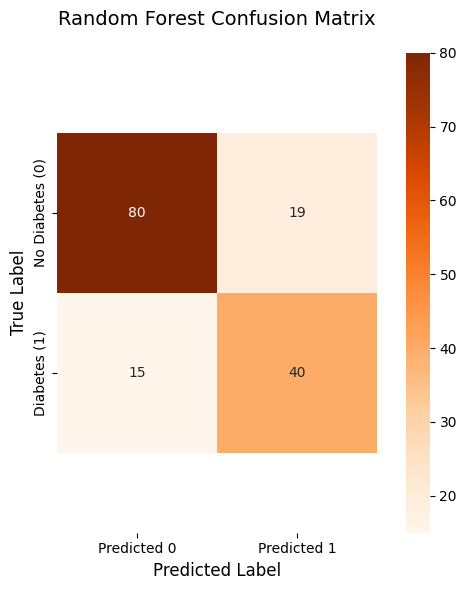

In [31]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train the Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # for ROC-AUC

# Classification Report (without support)
print("🔍 Classification Report (Random Forest):")
report = classification_report(y_test, y_pred_rf, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(columns=['support'])

# Add ROC-AUC column
df_report['ROC-AUC'] = np.nan
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Append ROC-AUC row
roc_row = pd.DataFrame({
    'precision': [np.nan],
    'recall': [np.nan],
    'f1-score': [np.nan],
    'ROC-AUC': [roc_auc]
}, index=['ROC-AUC'])

df_report = pd.concat([df_report, roc_row])

# Show the report (NaNs are kept as null)
print(df_report)

# Accuracy
print("\n✅ Prediction Accuracy: {:.2f}%".format(rf.score(X_test, y_test) * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=['No Diabetes (0)', 'Diabetes (1)'],
                     columns=['Predicted 0', 'Predicted 1'])

# Enhanced Plot of Confusion Matrix
plt.figure(figsize=(6, 6))
ax = sns.heatmap(cm_df, annot=True, fmt='g', cmap='Oranges', cbar=True, square=True)
plt.title("Random Forest Confusion Matrix", fontsize=14, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Fix cut-off display
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.tight_layout()
plt.show()


📊 Classification Report (Support Vector Machine):
              precision    recall  f1-score   ROC-AUC
0              0.783784  0.878788  0.828571       NaN
1              0.720930  0.563636  0.632653       NaN
accuracy       0.766234  0.766234  0.766234       NaN
macro avg      0.752357  0.721212  0.730612       NaN
weighted avg   0.761336  0.766234  0.758601       NaN
ROC-AUC             NaN       NaN       NaN  0.803122

✅ Prediction Accuracy: 76.62%


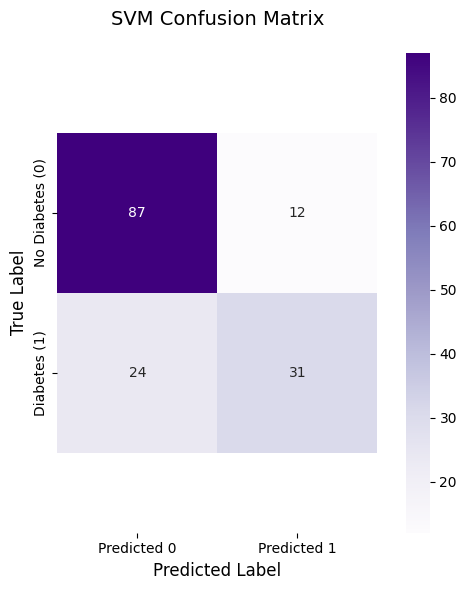

In [32]:
# Import libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train the SVM model with probability=True
svm = SVC(probability=True, random_state=0)
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]  # needed for ROC-AUC

# Classification Report (without support)
print("📊 Classification Report (Support Vector Machine):")
report = classification_report(y_test, y_pred_svm, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(columns=['support'])

# Add ROC-AUC column
df_report['ROC-AUC'] = np.nan
roc_auc = roc_auc_score(y_test, y_prob_svm)

# Append ROC-AUC row
roc_row = pd.DataFrame({
    'precision': [np.nan],
    'recall': [np.nan],
    'f1-score': [np.nan],
    'ROC-AUC': [roc_auc]
}, index=['ROC-AUC'])

df_report = pd.concat([df_report, roc_row])

# Show report with NaN kept
print(df_report)

# Accuracy
print("\n✅ Prediction Accuracy: {:.2f}%".format(svm.score(X_test, y_test) * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm_df = pd.DataFrame(cm, index=['No Diabetes (0)', 'Diabetes (1)'],
                     columns=['Predicted 0', 'Predicted 1'])

# Enhanced Plot of Confusion Matrix
plt.figure(figsize=(6, 6))
ax = sns.heatmap(cm_df, annot=True, fmt='g', cmap='Purples', cbar=True, square=True)
plt.title("SVM Confusion Matrix", fontsize=14, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Fix cutoff bug
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a summary dictionary
model_scores = {}

# Predict probabilities for ROC-AUC where needed
y_prob_lr = logreg.predict_proba(X_test)[:, 1]
y_prob_dt = dtree.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Add all model scores
model_scores['Logistic Regression'] = [
    accuracy_score(y_test, y_pred_lr),
    precision_score(y_test, y_pred_lr),
    recall_score(y_test, y_pred_lr),
    f1_score(y_test, y_pred_lr),
    roc_auc_score(y_test, y_prob_lr)
]

model_scores['Decision Tree'] = [
    accuracy_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_dt),
    roc_auc_score(y_test, y_prob_dt)
]

model_scores['Random Forest'] = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf),
    roc_auc_score(y_test, y_prob_rf)
]

model_scores['SVM'] = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_svm),
    roc_auc_score(y_test, y_prob_svm)
]

# Create DataFrame
metrics_df = pd.DataFrame(model_scores,
                          index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']).T

display(metrics_df)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.766234,0.686275,0.636364,0.660377,0.820569
Decision Tree,0.733766,0.602941,0.745455,0.666667,0.736364
Random Forest,0.779221,0.677966,0.727273,0.701754,0.840680
SVM,0.766234,0.720930,0.563636,0.632653,0.803122


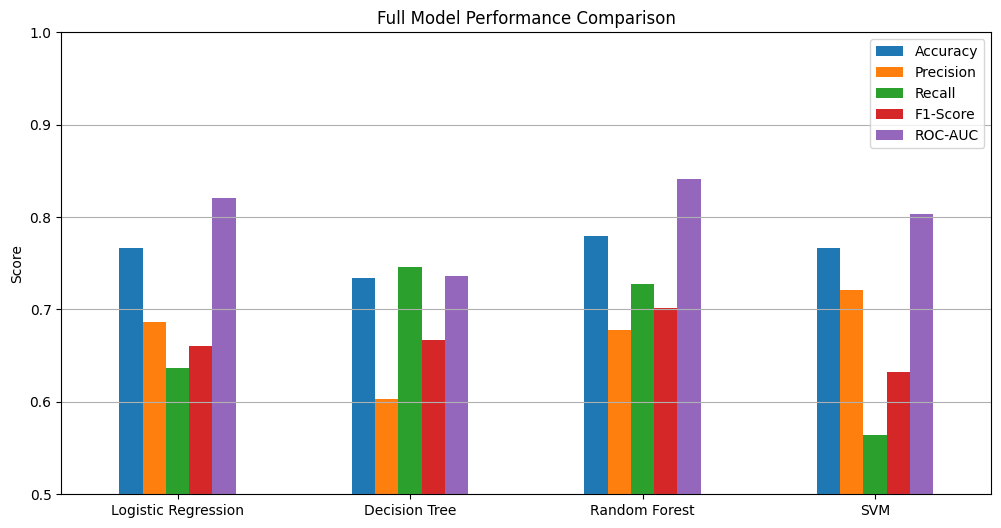

In [34]:
# Bar chart including all metrics
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(kind='bar', figsize=(12, 6))
plt.title('Full Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Prepare input and target
X = df_fe.drop('Outcome', axis=1)
y = df_fe['Outcome']

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract importance values
importances = rf.feature_importances_
features = X.columns


In [36]:
# Create DataFrame of features and their importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Show top 10
print(" Top 10 Most Important Features:")
display(importance_df.head(10))


 Top 10 Most Important Features:


,Feature,Importance
1,Glucose,0.267142
5,BMI,0.168769
7,Age,0.131567
6,DiabetesPedigreeFunction,0.122695
2,BloodPressure,0.088660
0,Pregnancies,0.085017
4,Insulin,0.071547
3,SkinThickness,0.064604


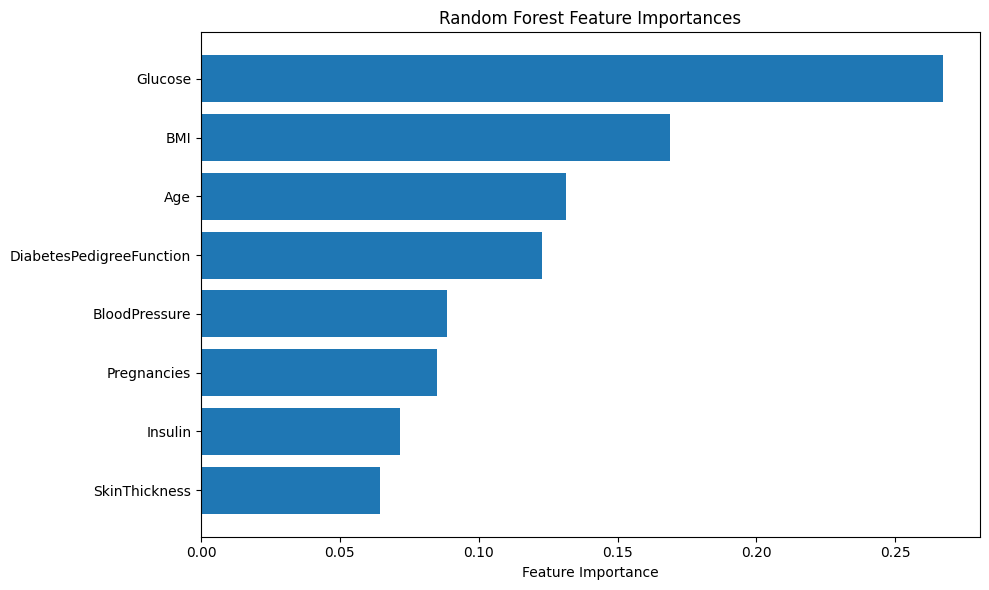

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create DataFrame for better visualization
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [44]:
pip install shap


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are already defined
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [46]:
import shap

# Create the explainer
explainer = shap.TreeExplainer(rf)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)


Shape of shap_values: [(8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (8, 2), (

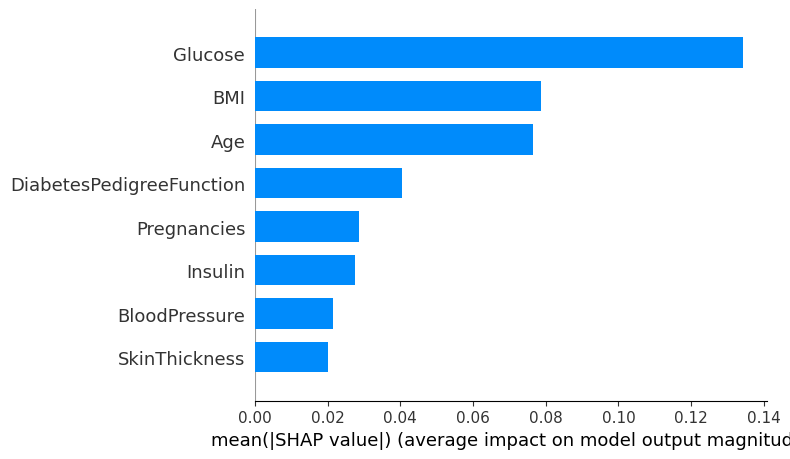

In [49]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train are defined, X is your columns

X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_df, y_train)

# SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_df)

# Inspect:
print("Shape of shap_values:", [s.shape for s in shap_values])
print("Shape of X_train_df:", X_train_df.shape)

# Use correct class - slice along the last dimension (index 1 for the second class)
shap_values_class1 = shap_values[:, :, 1] # Correct slicing

print("Shape of shap_values_class1:", shap_values_class1.shape) # Verify the shape

shap.summary_plot(shap_values_class1, X_train_df, plot_type="bar")